In [1]:
import pandas as pd

# 從提供的網址讀取各個大學的資訊
df = pd.read_csv("https://udb.moe.edu.tw/download/udata/static_file/%E5%AD%B81-1.%E6%AD%A3%E5%BC%8F%E5%AD%B8%E7%B1%8D%E5%9C%A8%E5%AD%B8%E5%AD%B8%E7%94%9F%E4%BA%BA%E6%95%B8-%E4%BB%A5%E3%80%8C%E7%B3%BB(%E6%89%80)%E3%80%8D%E7%B5%B1%E8%A8%88.csv", encoding='utf-8')

# 顯示DataFrame
display(df)


,學年度,設立別,學校類別,學校統計處代碼,學校名稱,系所代碼,系所名稱,學制班別,在學學生數小計,在學學生數男,在學學生數女
0,106,公立,一般大學,0001,國立政治大學,01111001,教育學系,學士班(日間),239,69,170
1,106,公立,一般大學,0001,國立政治大學,01111001,教育學系,碩士班(日間),46,11,35
2,106,公立,一般大學,0001,國立政治大學,01111001,教育學系,博士班,95,48,47
3,106,公立,一般大學,0001,國立政治大學,01114005,教育行政與政策研究所,碩士班(日間),47,13,34
4,106,公立,一般大學,0001,國立政治大學,01114006,學校行政碩士在職專班,碩士在職專班,73,26,47
...,...,...,...,...,...,...,...,...,...,...,...
57408,111,公立,一般大學,3002,臺北市立大學,10142052,運動健康科學系,學士班(日間),215,125,90
57409,111,公立,一般大學,3002,臺北市立大學,10142052,運動健康科學系,碩士班(日間),35,22,13
57410,111,公立,一般大學,3002,臺北市立大學,10152050,休閒運動管理學系,學士班(日間),202,111,91
57411,111,公立,一般大學,3002,臺北市立大學,10152050,休閒運動管理學系,碩士班(日間),36,19,17


In [2]:
ntut_df = df[(df["學校名稱"] == "國立臺北科技大學") & (df["學制班別"] == "學士班(日間)")]

# 選擇特定學年度（106年）並按在學學生數小計進行降序排序，取前10個系所名稱
major_disciplines = ntut_df[ntut_df["學年度"] == 106].sort_values(
    by=["在學學生數小計"], ascending=False)["系所名稱"].head(10).tolist()

# 建立布林遮罩，選擇系所名稱在 major_disciplines 中的資料
mask = ntut_df['系所名稱'].isin(major_disciplines)

# 篩選符合布林遮罩的資料，選擇特定欄位並以學年度為索引
ntut_major_disciplines_df = ntut_df[mask][[
    '學年度', '系所名稱', '在學學生數小計', '在學學生數男', '在學學生數女']].set_index('學年度')

ntut_major_disciplines_df.to_html('北科大十大科系分析.html')


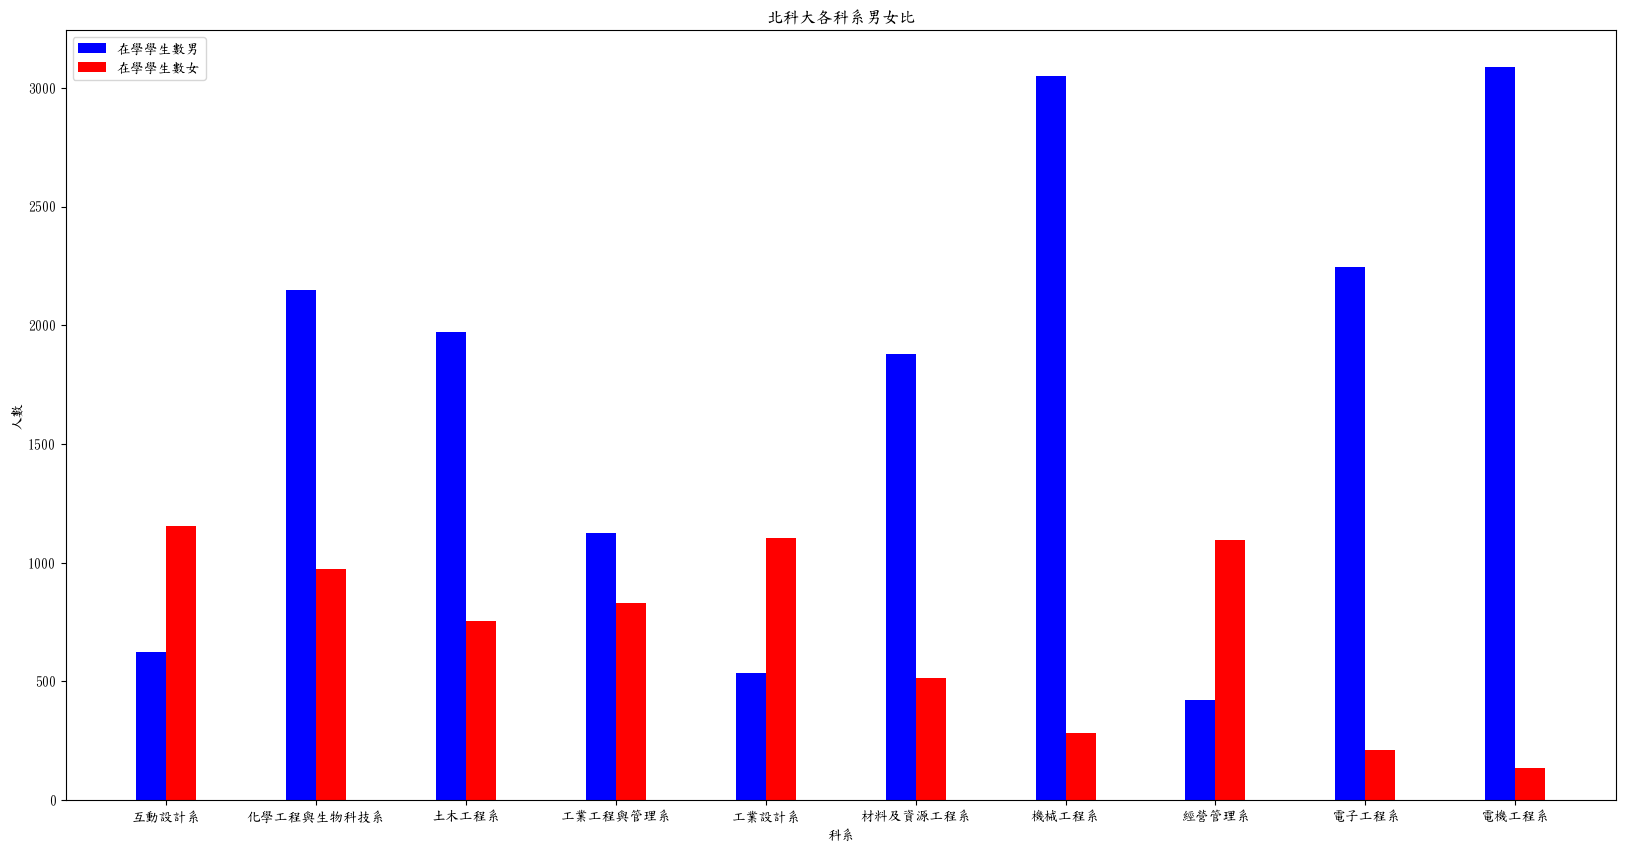

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# 進行系所名稱的分組和求和
ntut_major_disciplines_sum_df = ntut_major_disciplines_df.groupby('系所名稱').sum()

# 設定條形圖的參數
x = np.arange(len(ntut_major_disciplines_sum_df.index))
width = 0.2

# 設定中文字型為 DFKai-SB
plt.rcParams['font.family'] = ['DFKai-SB']

# 創建圖形並設定大小
plt.figure(figsize=(20, 10))

# 繪製男女在學學生數的條形圖
plt.bar(x-width/2,
        ntut_major_disciplines_sum_df['在學學生數男'], width, label='在學學生數男', color='blue')
plt.bar(x+width/2,
        ntut_major_disciplines_sum_df['在學學生數女'], width, label='在學學生數女', color='red')

plt.xticks(range(len(ntut_major_disciplines_sum_df.index)),
           ntut_major_disciplines_sum_df.index)
plt.xlabel('科系')
plt.ylabel('人數')
plt.legend()
plt.title('北科大各科系男女比')
plt.show()


In [4]:
from tabulate import tabulate

table = tabulate(ntut_major_disciplines_df, headers='keys', tablefmt='grid')

print(table)


+----------+----------------------+------------------+----------------+----------------+
|   學年度 | 系所名稱             |   在學學生數小計 |   在學學生數男 |   在學學生數女 |
+==========+======================+==================+================+================+
|      106 | 互動設計系           |              265 |             81 |            184 |
+----------+----------------------+------------------+----------------+----------------+
|      106 | 工業設計系           |              277 |             83 |            194 |
+----------+----------------------+------------------+----------------+----------------+
|      106 | 經營管理系           |              234 |             68 |            166 |
+----------+----------------------+------------------+----------------+----------------+
|      106 | 化學工程與生物科技系 |              509 |            352 |            157 |
+----------+----------------------+------------------+----------------+----------------+
|      106 | 材料及資源工程系     |              376 |            313 |         

In [5]:
import numpy as np

# 建立字典來存儲每個主要科系的年度變化
major_disciplines_annual_change = {}

# 定義年份
years = [106, 107, 108, 109, 110, 111]

# 對每個主要科系進行處理
for subject in major_disciplines:
    # 從 DataFrame 中選擇特定科系的資料，按學年度排序
    data = ntut_major_disciplines_df[ntut_major_disciplines_df["系所名稱"] == subject].sort_values(by=[
                                                                                               "學年度"])

    # 創建空列表來存儲該科系的年度變化
    major_disciplines_annual_change[subject] = []

    # 對於每個年份，嘗試從資料中獲取在學學生數小計，若不存在則填充為 NaN
    for year in years:
        try:
            major_disciplines_annual_change[subject].append(
                data.loc[year, '在學學生數小計'])
        except:
            major_disciplines_annual_change[subject].append(np.nan)

# 顯示主要科系的年度變化
print(major_disciplines_annual_change)


{'機械工程系': [598, 584, 580, 583, 521, 467], '電機工程系': [538, 517, 521, 537, 556, 557], '化學工程與生物科技系': [509, 498, 512, 521, 529, 553], '土木工程系': [419, 442, 460, 481, 464, 459], '電子工程系': [390, 393, 400, 417, 419, 437], '材料及資源工程系': [376, 380, 390, 412, 418, 417], '工業工程與管理系': [320, 324, 332, 328, 313, 338], '工業設計系': [277, 255, 282, 278, 263, 285], '互動設計系': [265, 288, 312, 307, 305, 300], '經營管理系': [234, 257, 272, 265, 247, 245]}


C:\Users\bob10\AppData\Local\Temp\ipykernel_16252\841238459.py:23: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


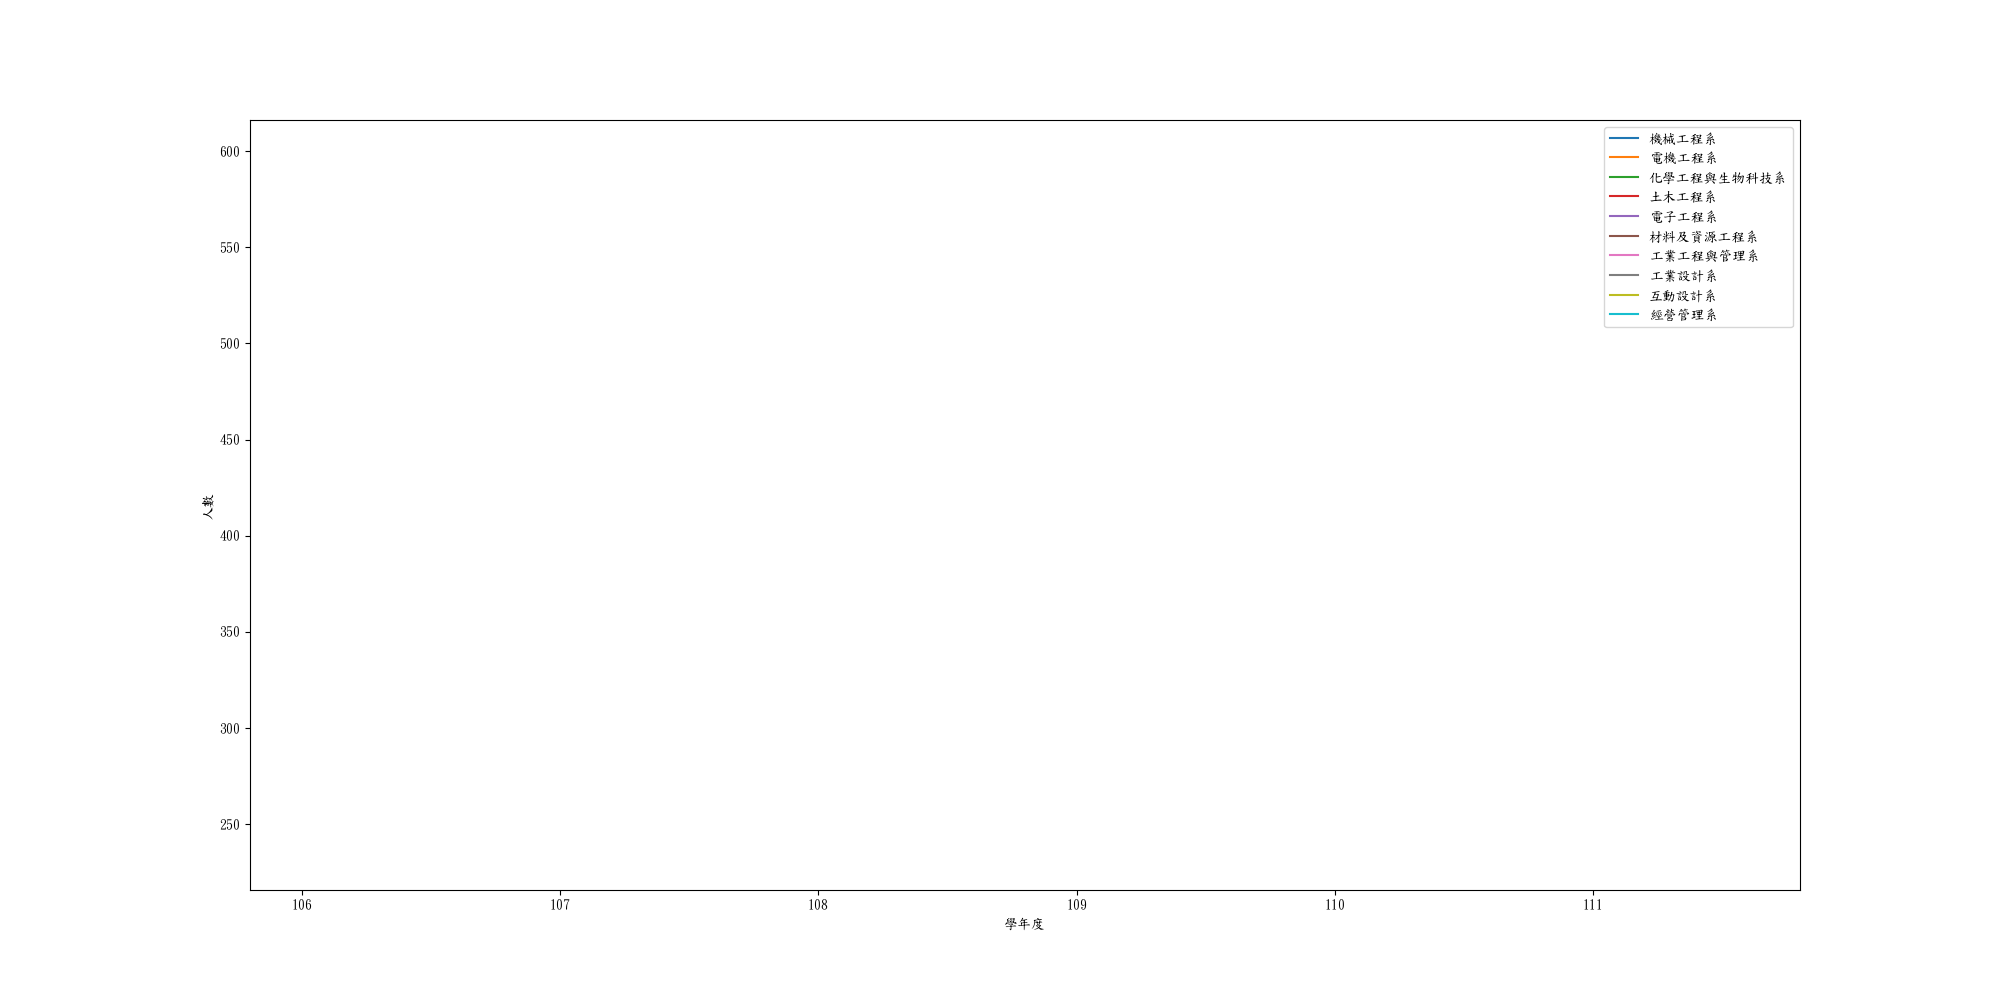

In [6]:
from IPython.display import Image, display
import imageio
import matplotlib.pyplot as plt
import os

# 創建圖片並繪製每年的變化
for i in range(1, 7):
    plt.figure(figsize=(20, 10))
    plt.xlim(min(years) - 0.2, max(years) + 0.8)
    for key, values in major_disciplines_annual_change.items():
        # 根據索引 i 只繪製前 i 個值，其餘用 NaN 填充
        plt.plot(years, values[:i]+[np.nan]*(6-i), label=key)
    plt.rcParams['font.family'] = ['DFKai-SB']
    plt.legend(loc='upper right')
    plt.xlabel('學年度')
    plt.ylabel('人數')
    plt.savefig(f'{i}.png')  # 儲存圖片為 PNG 格式
    plt.close()


images = []
for filename in ['1.png', '2.png', '3.png', '4.png', '5.png', '6.png']:
    image = imageio.imread(filename)
    images.append(image)
    os.remove(filename)  # 刪除暫存的圖片檔案

imageio.mimsave('mygif.gif', images, loop=0, duration=0.5)  # 將圖片序列轉換為 GIF 動畫

display(Image(filename='mygif.gif'))  # 顯示 GIF 動畫


In [7]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.palettes import Category10
import pandas as pd

output_notebook()

years = [106, 107, 108, 109, 110, 111]

# 創建一個 Bokeh figure 物件，設定圖形標題、x軸標籤、y軸標籤、寬度和高度
p = figure(title='系所學生數變化', x_axis_label='學年度',
           y_axis_label='學生數', width=1200, height=600)

num_series = len(major_disciplines_annual_change.keys())
colors = Category10[num_series]  # 使用 Category10 調色板獲取一組顏色

# 使用迴圈繪製折線圖
for index, column in enumerate(major_disciplines_annual_change.keys()):
    if column == '機械工程系':
        # 對於 '機械工程系' 使用虛線繪製折線
        p.line(years, major_disciplines_annual_change[column], legend_label=column,
               color=colors[index], line_width=2, line_dash=[14, 6])
    else:
        # 對於其他科系使用實線繪製折線
        p.line(years, major_disciplines_annual_change[column],
               legend_label=column, color=colors[index], line_width=2)

p.legend.location = 'top_left'  # 設定圖例位置為左上角
p.legend.click_policy = 'hide'  # 點擊圖例時隱藏對應的折線

show(p)  # 顯示 Bokeh 圖形


Loading BokehJS ...

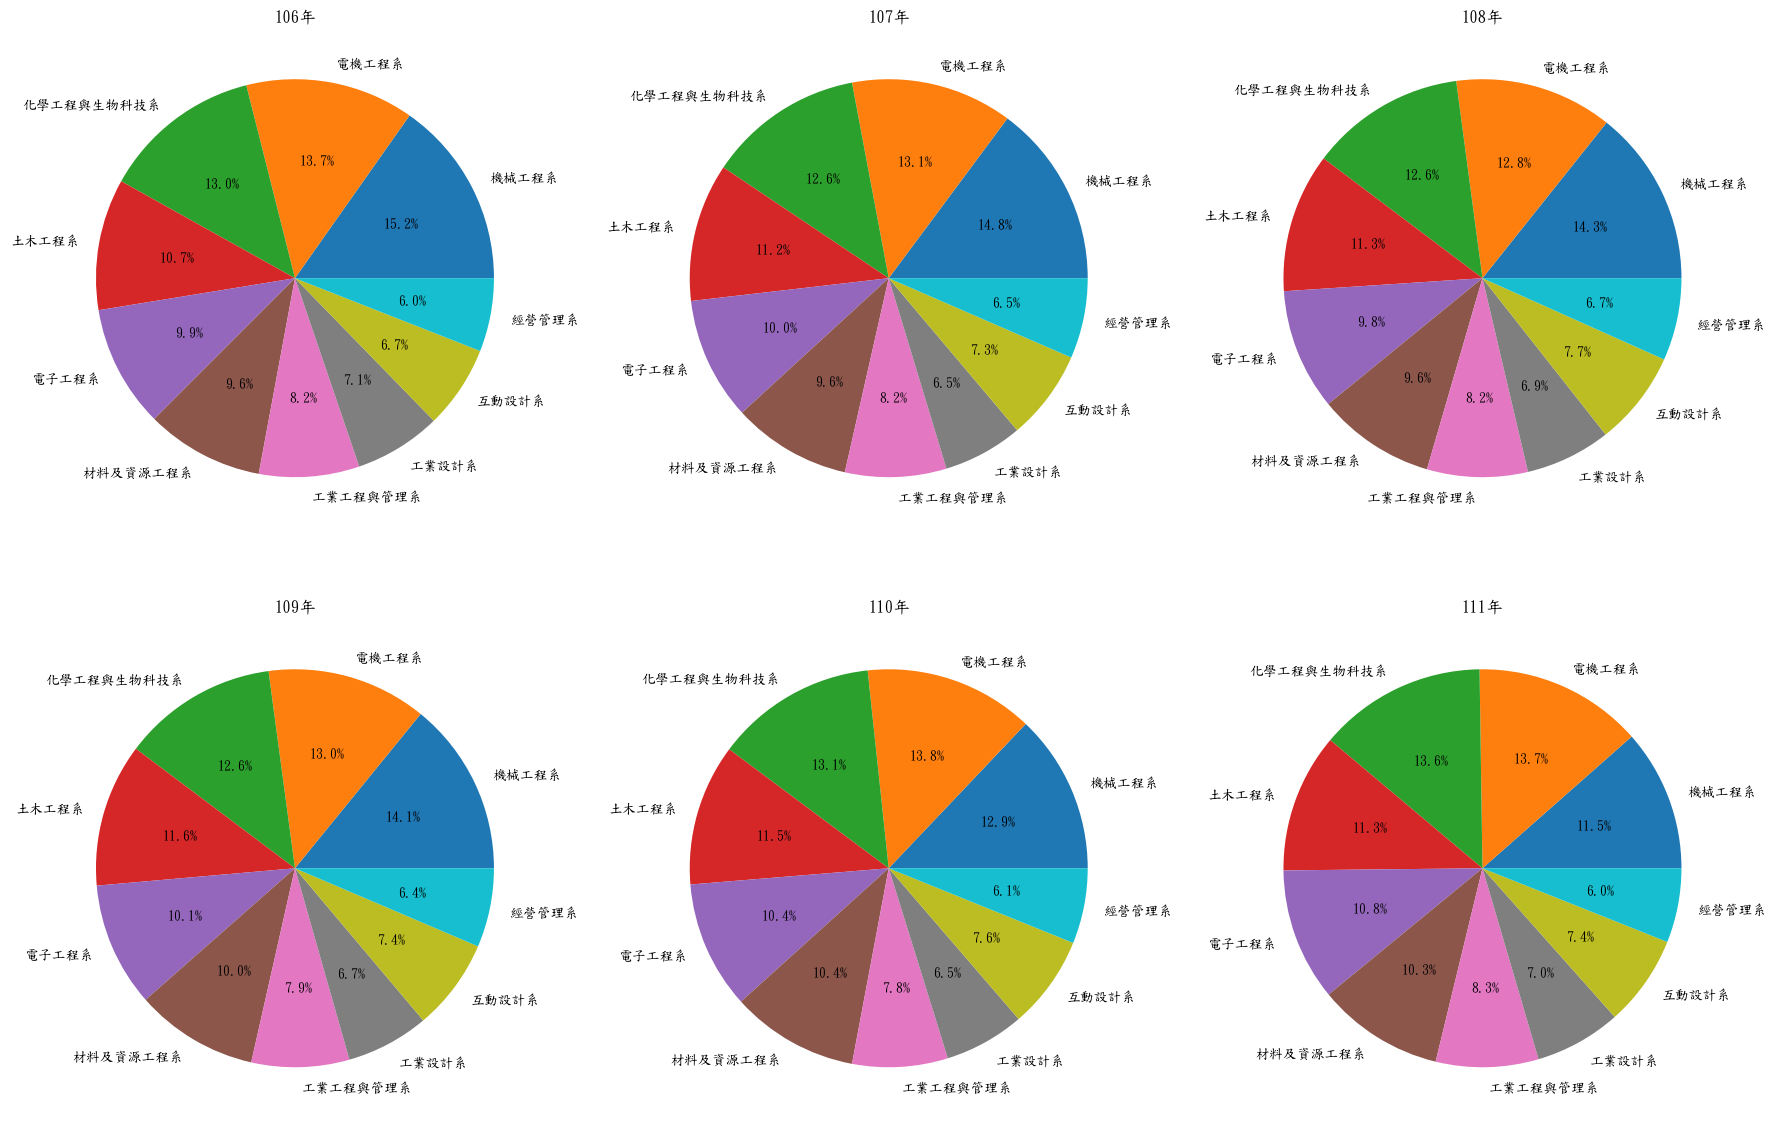

In [8]:
import matplotlib.pyplot as plt

years = [106, 107, 108, 109, 110, 111]

plt.figure(figsize=(18, 12))

# 繪製圓餅圖
for i, year in enumerate(years):
    data = [values[i] for values in major_disciplines_annual_change.values()]
    labels = major_disciplines_annual_change.keys()
    plt.subplot(2, 3, i+1)  # 在 2x3 的網格中指定子圖位置
    plt.pie(data, labels=labels, autopct='%1.1f%%')  # 繪製圓餅圖
    plt.title(f'{year}年')  # 設定子圖標題

plt.tight_layout()  # 調整子圖之間的間距

plt.show()


In [20]:
!pip install dash
!pip install jupyter-dash

In [2]:
import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output

In [3]:
major_disciplines_annual_change = {
    '機械工程系': [598, 584, 580, 583, 521, 467],
    '電機工程系': [538, 517, 521, 537, 556, 557],
    '化學工程與生物科技系': [509, 498, 512, 521, 529, 553],
    '土木工程系': [419, 442, 460, 481, 464, 459],
    '電子工程系': [390, 393, 400, 417, 419, 437],
    '材料及資源工程系': [376, 380, 390, 412, 418, 417],
    '工業工程與管理系': [320, 324, 332, 328, 313, 338],
    '工業設計系': [277, 255, 282, 278, 263, 285],
    '互動設計系': [265, 288, 312, 307, 305, 300],
    '經營管理系': [234, 257, 272, 265, 247, 245]
}

app = dash.Dash(__name__)

app.layout = html.Div(children=[
    html.H1(children='北科大十大科系學生數變化'),

    dcc.Dropdown(
        id='subject-dropdown',
        options=[
            {'label': '全部科系', 'value': '全部'}
        ] + [{'label': subject, 'value': subject} for subject in major_disciplines_annual_change],
        value='全部'
    ),

    dcc.Graph(id='major-disciplines-graph')
])


@app.callback(
    Output('major-disciplines-graph', 'figure'),
    Input('subject-dropdown', 'value')
)
def update_figure(subject):
    if subject == '全部':
        traces = [{'x': [106, 107, 108, 109, 110, 111], 'y': major_disciplines_annual_change[subject], 'name': subject}
                  for subject in data]
    else:
        traces = [{'x': [106, 107, 108, 109, 110, 111], 'y': major_disciplines_annual_change[subject], 'name': subject}]

    return {
        'data': traces,
        'layout': {
            'title': f'{subject} 學生數變化',
            'xaxis': {'title': '學年度'},
            'yaxis': {'title': '學生數'}
        }
    }


if __name__ == '__main__':
    app.run_server(debug=True)

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__'
 * Debug mode: on


SystemExit: 1

C:\Users\bob10\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py:3386: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
